In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#read in the dataset
data = pd.read_csv('../data/wiki_earthquakes_clean.csv', parse_dates=['origin_utc'] ,index_col=0)

In [3]:
#drop unnecessary columns
data = data.drop(columns=['pde_shaking_deaths', 'pde_total_deaths',
                      'utsu_total_deaths', 'em_dat_total_deaths',
                      'other_source_deaths'])

In [4]:
#view dataset
data.head()

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
0,1900-05-11 17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0.0
1,1900-07-12 06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,140.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,0.0,6.5,NaN,0.0
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,4.0


In [5]:
#check dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   origin_utc         1340 non-null   datetime64[ns]
 1   country            1339 non-null   object        
 2   lat                1324 non-null   float64       
 3   long               1324 non-null   float64       
 4   depth_km           1249 non-null   float64       
 5   magnitude          1339 non-null   float64       
 6   secondary_effects  373 non-null    object        
 7   death_total        1340 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 94.2+ KB


In [6]:
#check for unique values
data.nunique()

origin_utc           1337
country               106
lat                  1227
long                 1274
depth_km              432
magnitude              61
secondary_effects      12
death_total           294
dtype: int64

In [7]:
# checking for duplicates
data.origin_utc.value_counts()

1993-01-15 11:06:00    2
1990-05-05 07:21:00    2
1990-04-26 09:37:00    2
1999-09-13 11:55:00    1
1995-12-19 23:28:00    1
                      ..
2005-02-22 02:25:00    1
1918-02-13 06:07:00    1
1956-10-31 14:03:00    1
1962-09-01 19:20:00    1
1983-08-17 12:17:00    1
Name: origin_utc, Length: 1337, dtype: int64

In [8]:
# removing duplicates based on time and creating 'quake_df'
quake_df = data.drop_duplicates(subset=['origin_utc'])

In [166]:
quake_df.describe()

,lat,long,depth_km,magnitude,death_total
count,1321.000000,1321.000000,1246.000000,1336.000000,1337.000000
mean,21.352095,39.105490,29.525201,6.397680,2359.630516
std,21.467576,80.152599,44.899718,0.968215,23426.121471
min,-54.000000,-178.162000,0.000000,2.000000,0.000000
25%,8.149000,-0.658000,10.000000,5.700000,2.000000
50%,28.950000,51.565000,18.000000,6.400000,8.000000
75%,38.000000,103.672000,35.000000,7.100000,76.000000
max,66.226000,178.291000,644.600000,9.500000,655237.000000


The death_total column is riddled with outliers, so we'll remember that as we investigate the data further

## 1) Are there factors that make an earthquake more likely?

Let's look at the various attributes of earthquakes in the dataset starting with depth

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



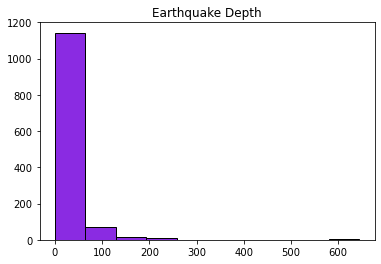

In [189]:
#basic histogram for depth
depth = quake_df['depth_km']
plt.hist(depth, color='blueviolet', edgecolor='k')
plt.title('Earthquake Depth');

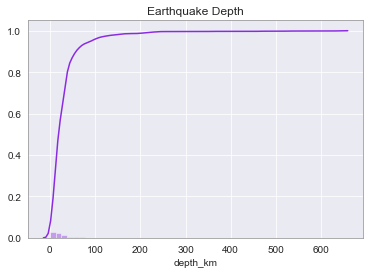

In [231]:
#histogram and cdf of depth
sns.distplot(depth,
            kde_kws={'cumulative': True},
            color='blueviolet')
plt.title('Earthquake Depth');

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



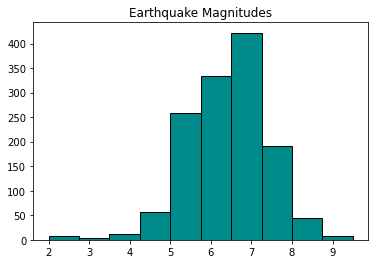

In [186]:
#basic histogram of magnitude
magnitude = quake_df['magnitude']
plt.hist(magnitude, color='darkcyan', edgecolor='k')
plt.title('Earthquake Magnitudes');

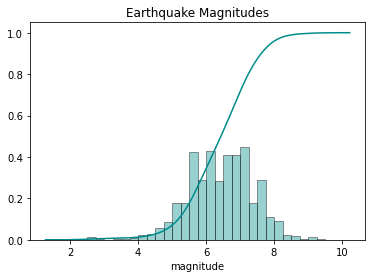

In [185]:
#seaborn histogram and cumulative distribution function
sns.distplot(magnitude, color='darkcyan',
            hist_kws={'cumulative': False, 'edgecolor':'k'},
            kde_kws={'cumulative': True})
plt.title('Earthquake Magnitudes');

Magnitude is nearly a normal distribution!

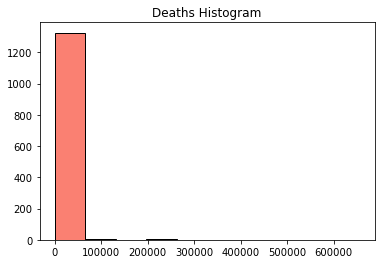

In [191]:
#basic deaths histogram
deaths = quake_df['death_total']
plt.hist(deaths, color='salmon', edgecolor='k')
plt.title('Deaths Histogram');

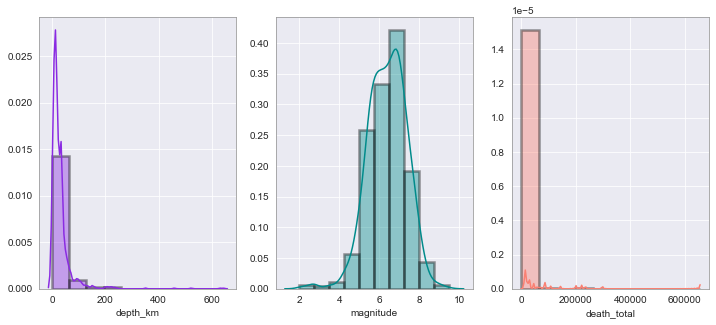

In [295]:
sns.set_style('darkgrid',{'axes.edgecolor': '.6'},)
f, ax = plt.subplots(1,3,figsize = (12,5))
plt.rcParams["patch.force_edgecolor"] = True

vis1 = sns.distplot(quake_df["depth_km"],bins=10, color='blueviolet', 
                    hist_kws=dict(edgecolor="k",linewidth=2.5), ax= ax[0])

vis2 = sns.distplot(quake_df["magnitude"],bins=10,color='darkcyan', 
                    hist_kws=dict(edgecolor="k",linewidth=2.5), ax=ax[1])

vis3 = sns.distplot(quake_df["death_total"],bins=10,color='salmon', 
                    hist_kws=dict(edgecolor="k", linewidth=2.5), ax=ax[2])

plt.savefig('../wiki_distributions.png', dpi=100)

# https://towardsdatascience.com/quick-code-to-spruce-up-your-histograms-scatterplots-ca44b9e2777f

Both magnitude and deaths are heavily skewed!

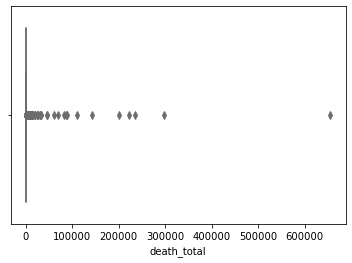

In [177]:
#deaths boxplot
sns.boxplot(data=quake_df, x=quake_df['death_total'],
           color='salmon');

In [16]:
deaths.quantile(0.25)

2.0

In [17]:
#calculating the IQR of deaths 
deathsQ1 = quake_df['death_total'].quantile(0.25)
deathsQ3 = quake_df['death_total'].quantile(0.75)
deathsIQR = deathsQ3 - deathsQ1

#used this site https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02

In [18]:
#create 'whiskers' of boxplot
death_lower_whisker = deathsQ1 - 1.5 * deathsIQR
death_upper_whisker = deathsQ3 + 1.5 * deathsIQR

death_lower_whisker, death_upper_whisker

(-109.0, 187.0)

In [19]:
#creating df from IQR
death_iqr_df = quake_df[quake_df['death_total'] < death_upper_whisker]

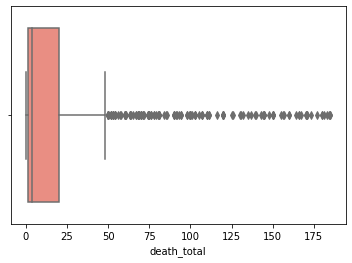

In [179]:
#boxplot of deaths IQR
sns.boxplot(data=death_iqr_df, x=death_iqr_df['death_total'],
           color='salmon');

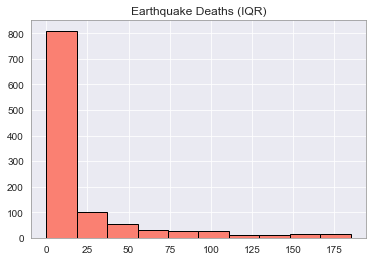

In [203]:
#histogram of deaths IQR
plt.hist(death_iqr_df['death_total'], color='salmon', edgecolor='k')
plt.title('Earthquake Deaths (IQR)');

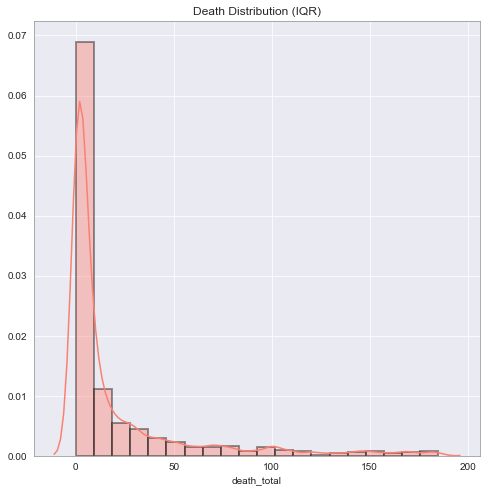

In [296]:
plt.rcParams["patch.force_edgecolor"] = True

plt.figure(figsize=(8,8)) #adjust the size of your graph

sns.distplot(death_iqr_df["death_total"], bins= 20,color ='salmon',
hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('Death Distribution (IQR)')
plt.savefig('../deaths_dist_IQR.png', dpi=100);

We know the movement of tectonic plates is a major factor in regards to earthquakes, so let's take a glance at where those plates are.

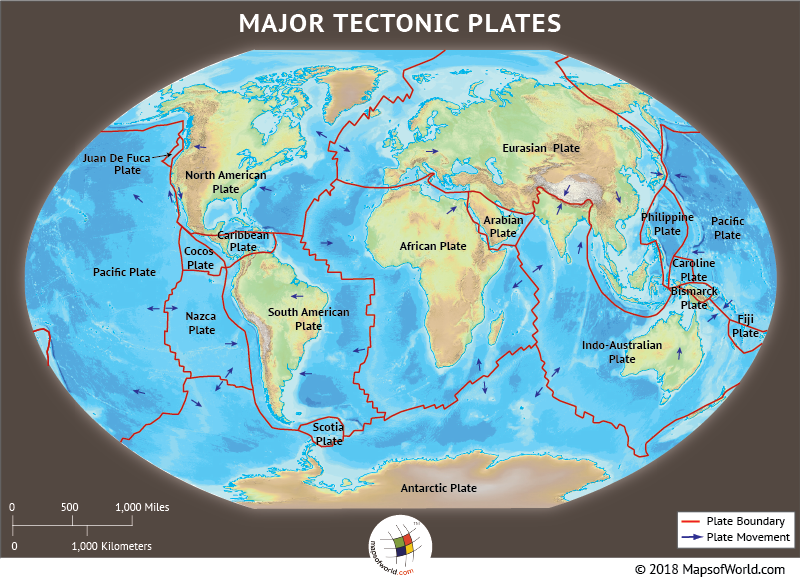

In [310]:
#Import library
from IPython.display import Image

#Load image from local storage
Image(filename = "../data/tectonic_plates.png", 
      width = 600, height = 200)

# https://towardsdatascience.com/adding-image-files-inside-an-ipython-notebook-python-and-r-2ba089a658b8

In [339]:
import plotly.graph_objects as go
quakes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
fig = go.Figure(go.Densitymapbox(lat=quakes.Latitude, lon=quakes.Longitude, z=quakes.Magnitude, radius=6))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [208]:
#Plotly scatterplot on map
fig = px.scatter_mapbox(quake_df, lat="lat", lon="long", color="magnitude", size="death_total",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20, zoom=0.5,
                  mapbox_style="carto-positron")
fig.show()

Coincedence? I think not! As expected we're seeing a lot of activity around the edge of the Arabian, Eurasian, and Indo-Australian plates.

## Are there factors that make an earthquake more deadly?

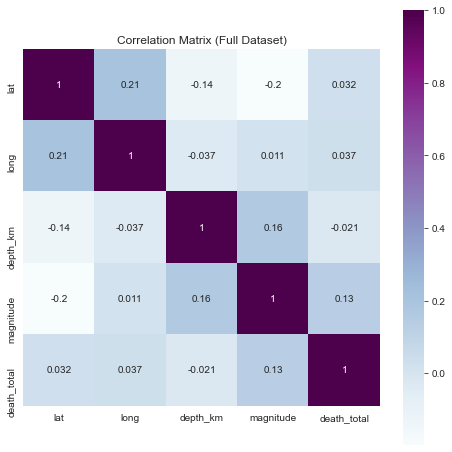

In [321]:
# Heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(quake_df.corr(), annot=True, square=True,
           cmap='BuPu')
plt.title('Correlation Matrix (Full Dataset)');

Death total is not highly correlated to any feature when looking at the entire dataframe. 

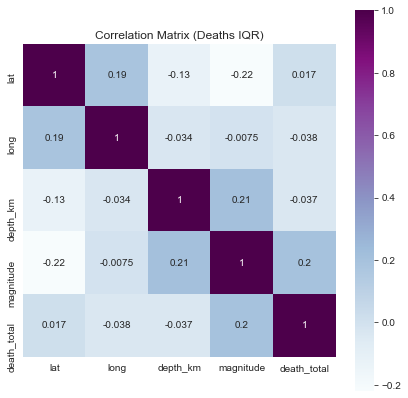

In [323]:
# dropping origin_utc for heatmap
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(death_iqr_df.corr(), annot=True, square=True,
           cmap='BuPu')
plt.title('Correlation Matrix (Deaths IQR)')
plt.savefig('../correlation_matrix.png', dpi=200);

A rational thought would be the greater the magnitude, the more deadly the earthquake. Let's explore!

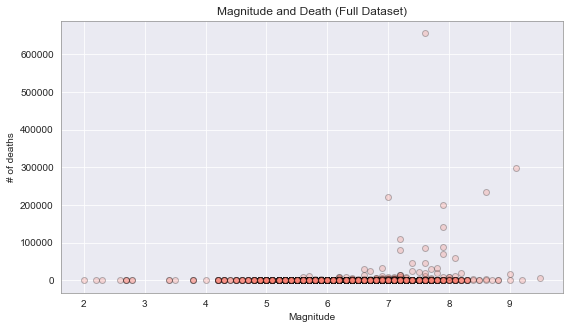

In [301]:
#scatterplot of deaths vs magnitude
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(quake_df['magnitude'], quake_df['death_total'], 
           color='salmon', edgecolor='black', alpha=.25)
ax.set_xlabel('Magnitude')
ax.set_ylabel('# of deaths')
ax.tick_params('y')
ax.set_title('Magnitude and Death (Full Dataset)')
plt.savefig('../magnitude_deaths_alldata.png', dpi=100);

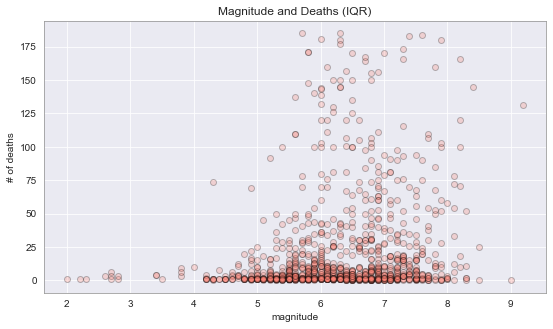

In [302]:
#scatterplot of deaths vs magnitude
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(death_iqr_df['magnitude'], death_iqr_df['death_total'], 
           color='salmon', edgecolor='black', alpha=.25)
ax.set_xlabel('magnitude')
ax.set_ylabel('# of deaths')
ax.tick_params('y')
ax.set_title('Magnitude and Deaths (IQR)')
plt.savefig('../magnitude_and_deaths_iqr.png', dpi=100);

In [27]:
#giving magnitude categorical variables to use for plotting
quake_df['grouped_magnitude'] = pd.cut(quake_df['magnitude'], 
                                       3, 
                                       labels=['low', 'medium', 'high'])

<ipython-input-27-f5753b7724cb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#checking pd.cut values for magnitude levels
pd.cut(quake_df['magnitude'], 3)

0       (4.5, 7.0]
1       (4.5, 7.0]
2       (7.0, 9.5]
3       (4.5, 7.0]
4       (4.5, 7.0]
           ...    
1335    (4.5, 7.0]
1336    (7.0, 9.5]
1337    (4.5, 7.0]
1338    (7.0, 9.5]
1339    (4.5, 7.0]
Name: magnitude, Length: 1337, dtype: category
Categories (3, interval[float64]): [(1.992, 4.5] < (4.5, 7.0] < (7.0, 9.5]]

In [29]:
#checking pd.cut values for magnitude levels
death_iqr_df['grouped_magnitude'] = pd.cut(quake_df['magnitude'], 
                                           3, 
                                           labels=['low', 'medium', 'high'])

<ipython-input-29-e5395226aa5a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
#checking cut on df
pd.cut(death_iqr_df['magnitude'], 3)

0       (6.8, 9.2]
1       (4.4, 6.8]
2       (6.8, 9.2]
3       (4.4, 6.8]
4       (4.4, 6.8]
           ...    
1333    (4.4, 6.8]
1335    (4.4, 6.8]
1336    (6.8, 9.2]
1337    (6.8, 9.2]
1339    (6.8, 9.2]
Name: magnitude, Length: 1094, dtype: category
Categories (3, interval[float64]): [(1.993, 4.4] < (4.4, 6.8] < (6.8, 9.2]]

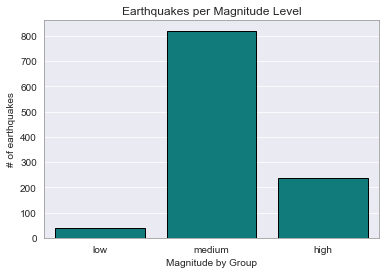

In [328]:
#seaborn countplot

ax = sns.countplot(x='grouped_magnitude', data=death_iqr_df,
                color='darkcyan', edgecolor='k')
plt.title('Earthquakes per Magnitude Level')
plt.xlabel('Magnitude by Group')
plt.ylabel('# of earthquakes');

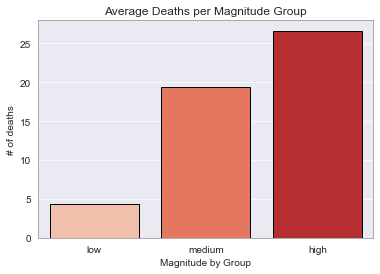

In [330]:
#seaborn barplot using mean 

ax = sns.barplot(x='grouped_magnitude', y='death_total', data=death_iqr_df,
                palette='Reds', edgecolor='k', ci=None, capsize=.1)
plt.title('Average Deaths per Magnitude Group')
plt.xlabel('Magnitude by Group')
plt.ylabel('# of deaths')
plt.savefig('../avg_deaths_mag_iqr.png', dpi=200);

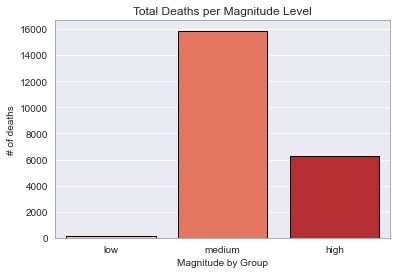

In [229]:
#seaborn barplot for the sum of deaths

ax = sns.barplot(x='grouped_magnitude', y='death_total', data=death_iqr_df, 
                 palette='Reds', edgecolor='k', estimator=sum, ci=None)
plt.title('Total Deaths per Magnitude Level')
plt.xlabel('Magnitude by Group')
plt.ylabel('# of deaths');

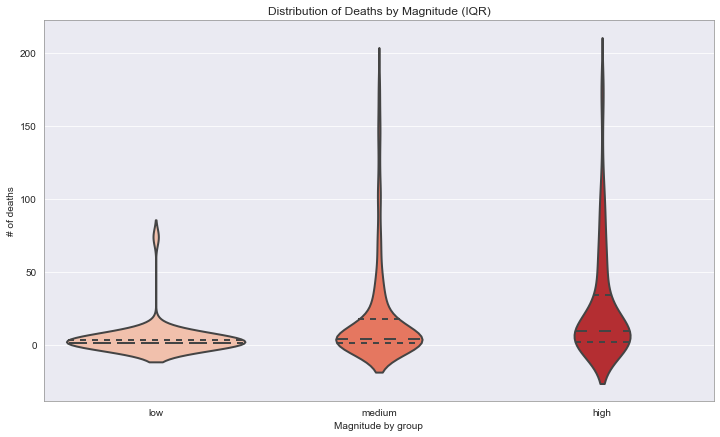

In [303]:
#seaborn violin plot for distribution of deaths by magnitude

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.violinplot(x='grouped_magnitude', y='death_total', 
                    data=death_iqr_df, palette='Reds',
                   linewidth=2, inner='quartile')

plt.xlabel('Magnitude by group')
plt.ylabel('# of deaths')
plt.title('Distribution of Deaths by Magnitude (IQR)')
plt.savefig('../deaths_violin_IQR.png', dpi=100);

Another consideration is there must be a large number of people around for there to be a high number of deaths.

In [332]:
#checking the country with the most earthquakes
quake_df['country'].value_counts().head()

China        165
Indonesia     97
Turkey        95
Iran          92
Japan         81
Name: country, dtype: int64

In [333]:
#checking the country with the most deaths
quake_df.groupby('country')['death_total'].sum().sort_values(ascending=False).head()

country
China        1284256.0
Indonesia     343574.0
Haiti         222523.0
Japan         185146.0
Iran          177960.0
Name: death_total, dtype: float64

Let's add some population data to China

In [37]:
#adding population dataframe
china_pop = pd.read_csv('../data/china_pop_clean.csv', index_col=0)

In [38]:
#create subset dataframe of china earthquakes
china_quakes = quake_df[quake_df['country'] == 'China']

In [39]:
#create year column for our join
china_quakes['year'] = quake_df['origin_utc'].dt.year

<ipython-input-39-531ecd5f5deb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
#merge population and earthquakes
china_quakes = china_quakes.merge(china_pop, on='year', how='inner')

In [41]:
china_quakes.head()

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total,grouped_magnitude,year,Country Name,pop
0,1965-11-13 04:33:00,China,43.840,87.755,51.6,7.0,NaN,7.0,medium,1965,China,715185000.0
1,1966-02-05 15:12:00,China,26.160,103.171,9.2,5.6,NaN,371.0,medium,1966,China,735400000.0
2,1966-03-07 21:29:00,China,37.388,114.963,7.7,6.6,NaN,0.0,medium,1966,China,735400000.0
3,1966-03-22 08:11:00,China,37.551,114.991,17.7,5.6,NaN,8064.0,medium,1966,China,735400000.0
4,1966-09-28 14:00:00,China,27.457,100.089,5.5,5.8,NaN,32.0,medium,1966,China,735400000.0


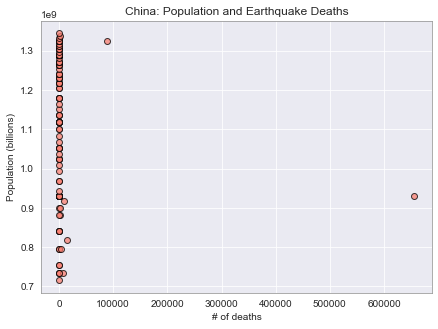

In [331]:
#look at deaths compared to population

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(china_quakes['death_total'], china_quakes['pop'], 
           color='salmon', edgecolor='black', alpha=.75) 
ax.set_xlabel('# of deaths')
ax.set_ylabel('Population (billions)')
plt.title('China: Population and Earthquake Deaths');

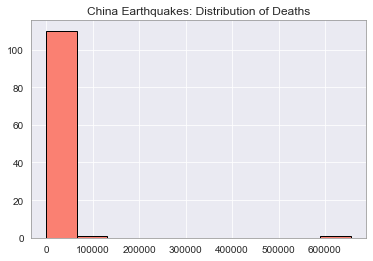

In [327]:
plt.hist(china_quakes['death_total'], color='salmon', edgecolor='k')
plt.title('China Earthquakes: Distribution of Deaths');

In [306]:
# checking for correlation between population and death_total
np.corrcoef(china_quakes['pop'], china_quakes['death_total'])

array([[ 1.        , -0.08323324],
       [-0.08323324,  1.        ]])

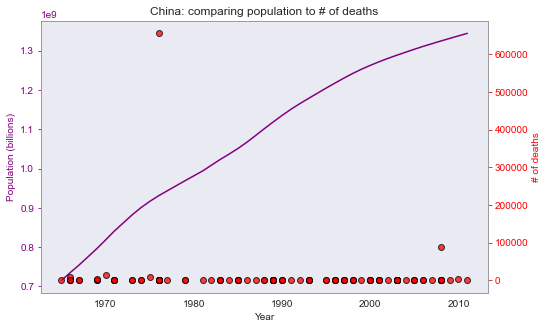

In [326]:
#look at deaths compared to population

sns.set_style()
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(china_quakes['year'], china_quakes['pop'], color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('Population (billions)', color = 'purple')
ax.tick_params('y', colors = 'purple')
ax.grid(False)
ax2 = ax.twinx()
ax2.scatter(china_quakes['year'], china_quakes['death_total'], 
            color='red', edgecolor='k', alpha=0.75)
ax2.set_ylabel('# of deaths', color = 'red')
ax2.tick_params('y', colors = 'red')
ax2.grid(False)
plt.title('China: comparing population to # of deaths')
plt.savefig('../china_pop_deaths.png', dpi=200);

This doesn't look correlated—at least in China!

In [62]:
#creating df of only quakes with secondary effects
effects_df = quake_df[quake_df['secondary_effects'].notnull()]

In [63]:
effects_df.describe()

,lat,long,depth_km,magnitude,death_total
count,368.000000,368.000000,365.000000,371.000000,371.00000
mean,15.894164,38.666761,30.452877,6.883019,2850.93531
std,22.898058,96.733455,45.077877,0.955189,19294.19383
min,-45.240000,-163.500000,0.000000,3.800000,0.00000
25%,-1.775000,-72.505250,11.000000,6.200000,2.50000
50%,18.437500,70.039500,22.000000,6.900000,18.00000
75%,35.928250,124.104000,35.000000,7.600000,138.00000
max,61.017000,178.200000,631.000000,9.500000,297200.00000


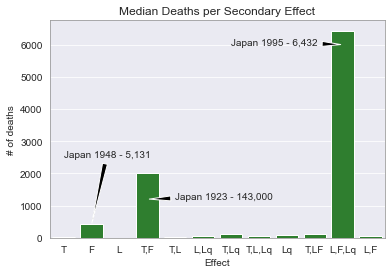

In [290]:
#seaborn barplot of the mean of total deaths

fig, ax = plt.subplots()

ax = sns.barplot(x='secondary_effects', y='death_total', data=effects_df, 
                 estimator= np.median,
                 color='forestgreen', ci=None)
plt.title('Median Deaths per Secondary Effect')
plt.xlabel('Effect')
plt.ylabel('# of deaths')
plt.annotate('Japan 1995 - 6,432', (10, 6000), 
             xytext=(6, 6000),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", facecolor='black'))
plt.annotate('Japan 1923 - 143,000', (3, 1200), 
             xytext=(4, 1200),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", facecolor='black'))
plt.annotate('Japan 1948 - 5,131', (1, 400), 
             xytext=(0, 2500),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", facecolor='black'));

In [274]:
# reviewing top # of deaths from above plot
effects_df[effects_df['secondary_effects'] == 'L,F,Lq']

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total,grouped_magnitude
980,1995-01-16 20:46:00,Japan,34.58,135.025,22.0,6.9,"L,F,Lq",6432.0,medium


In [275]:
# reviewing top # of deaths from above plot
effects_df[effects_df['secondary_effects'] == 'T,F']

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total,grouped_magnitude
116,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",143000.0,high
137,1927-03-07 09:27:00,Japan,35.802,134.924,9.6,7.6,"T,F",2925.0,high
160,1930-05-05 13:45:00,Burma,17.665,96.543,35.0,7.2,"T,F",550.0,high
287,1946-12-20 19:19:00,Japan,32.500,134.500,0.0,8.1,"T,F",2000.0,high
420,1964-06-16 04:01:00,Japan,38.434,139.226,13.1,7.5,"T,F",26.0,high


In [276]:
# reviewing top # of deaths from above plot
effects_df[effects_df['secondary_effects'] == 'F']

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total,grouped_magnitude
32,1906-04-18 13:12:00,UnitedStates,38.000,-123.000,0.0,7.8,F,2000.0,high
128,1925-05-23 02:09:00,Japan,35.600,134.800,5.0,6.8,F,428.0,medium
176,1931-03-31 16:02:00,Nicaragua,13.200,-85.700,NaN,5.6,F,1000.0,medium
261,1943-09-10 08:36:00,Japan,35.250,134.000,0.0,7.0,F,1083.0,medium
299,1948-06-28 07:13:00,Japan,36.500,136.000,0.0,7.0,F,5131.0,medium
903,1991-06-21 06:27:00,ElSalvador,13.408,-89.633,69.8,5.8,F,1.0,medium
1040,1998-01-10 03:50:00,China,41.137,114.523,5.0,5.7,F,70.0,medium
1207,2004-02-05 21:05:00,Indonesia,-3.661,135.597,23.0,7.0,F,37.0,medium
1235,2004-11-26 02:25:00,Indonesia,-3.615,135.450,24.0,7.1,F,32.0,high


In [64]:
#creating df of quakes without secondary effects
quakes_only = quake_df[quake_df['secondary_effects'].isnull()]

In [246]:
effects_df['death_total'].median(), quakes_only['death_total'].median()

(18.0, 6.0)

The average deaths are higher when secondary effects are present—but the data is skewed by outliers.

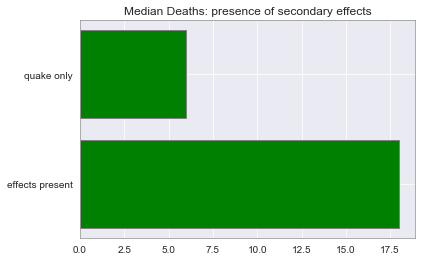

In [292]:
#bar plot of the two averages

median_list = [('effects present' ,effects_df['death_total'].median()), ('quake only', quakes_only['death_total'].median())]

plt.barh(range(len(median_list)), [val[1] for val in median_list], align='center', 
         color='green', edgecolor='gray', linewidth=1, height=0.8)
plt.yticks(range(len(median_list)), [val[0] for val in median_list])
plt.title('Median Deaths: presence of secondary effects');